# Seaborn
Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive data visualisations.

For more see the https://seaborn.pydata.org/tutorial.html

Behind the scenes, Seaborn uses Matplotlib. The underlying Matplotlib objects are always accessible and need to be manipulated for customisation and fine tuning.

By convention, Seaborn is imported with the shorthand `sns`.

For interactive work, it’s recommended to use a Jupyter/IPython interface in matplotlib mode, or else you’ll have to call `matplotlib.pyplot.show()` when you want to see the plot.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# makes the inline-figures in notebooks look crisper
%config InlineBackend.figure_format = 'svg'

Load an example dataset:

In [3]:
df_iris = sns.load_dataset("iris")

And generate a Scatterplot:

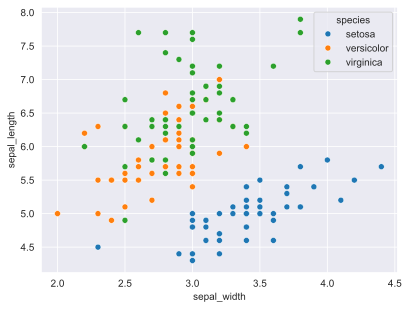

In [4]:
x = df_iris["sepal_width"]
y = df_iris["sepal_length"]
c = df_iris["species"]

sns.scatterplot(x=x, y=y, hue=c)
plt.show()

There is always access to the underlying Matplotlib objects. In fact, it is actually recommended that `Figure` and `Axes` are created explicitly, and the Seaborn plots are then attached to them:

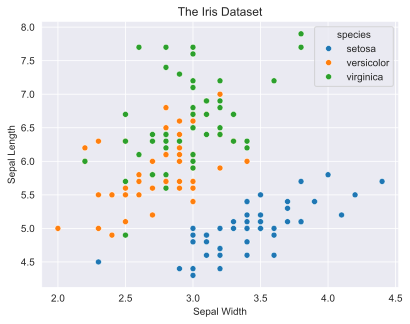

In [5]:
x = df_iris["sepal_width"]
y = df_iris["sepal_length"]
c = df_iris["species"]

fig, ax = plt.subplots() # create fig and ax
sns.scatterplot(
  x=x, y=y, hue=c,
  ax=ax # fill the ax argument with our Axes
)

# Now you can customise the Matplotlib objects further:
ax.set_title("The Iris Dataset")
ax.spines[["top", "right"]].set_visible(False)
ax.set_xlabel("Sepal Width")
ax.set_ylabel("Sepal Length")

plt.show()

A Barplot:

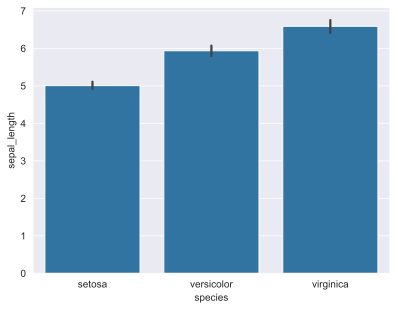

In [6]:
fig, ax = plt.subplots()
sns.barplot(x='species', y='sepal_length', data=df_iris, ax=ax)
plt.show()

## Statistical Visualisations Made Simple

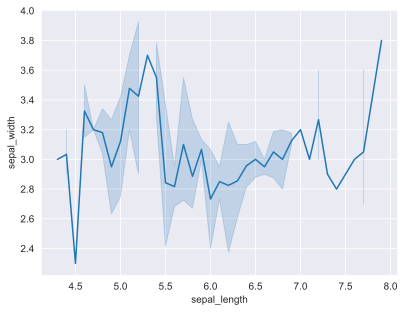

In [7]:
fig, ax = plt.subplots()
sns.lineplot(x="sepal_length", y="sepal_width", data=df_iris, ax=ax)
plt.show()

Histogram with Density Plot:

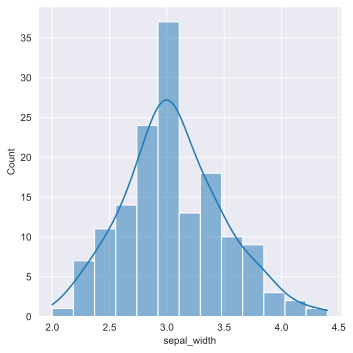

In [8]:
sns.displot(df_iris['sepal_width'], kde=True)
plt.show()

Regression line:

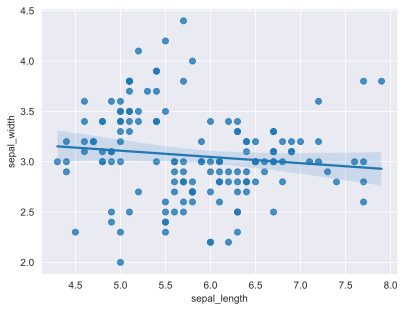

In [9]:
x = df_iris["sepal_length"]
y = df_iris["sepal_width"]

fig, ax = plt.subplots()
sns.regplot(x=x, y=y, ax=ax)
plt.show()

Pairplot:

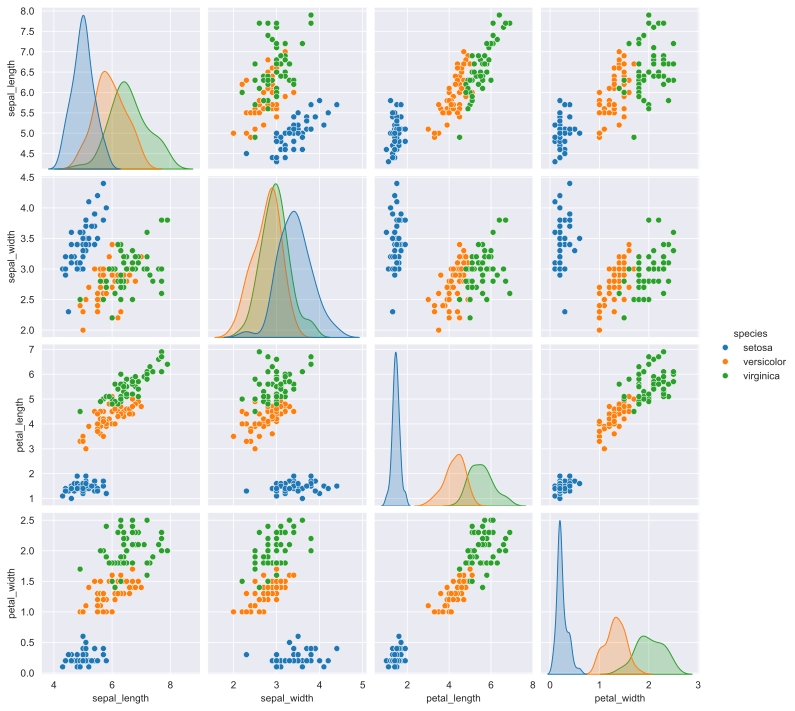

In [10]:
sns.pairplot(data=df_iris, hue='species')
plt.show()

## Grouping Made Simple

Grouped Boxplot

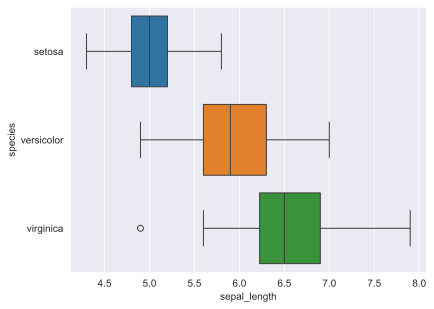

In [11]:
x = df_iris["sepal_length"]
y = df_iris["species"]

fig, ax = plt.subplots()
sns.boxplot(x=x, y=y, hue=y, ax=ax)
plt.show()

Grouped Density Plot:

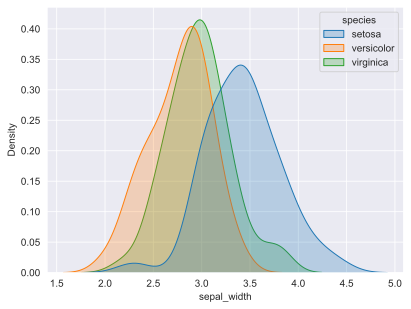

In [12]:
x = df_iris["sepal_width"]
c = df_iris["species"]

fig, ax = plt.subplots()
sns.kdeplot(x=x, hue=c, fill=True, ax=ax)
plt.show()

Grouped Swarmplot/Stripplot:

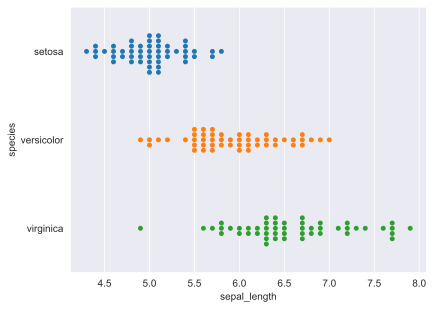

In [13]:
x = df_iris["sepal_length"]
y = df_iris["species"]

fig, ax = plt.subplots()
sns.swarmplot(x=x, y=y, hue=y, ax=ax)
plt.show()

Grouped Violinplot:

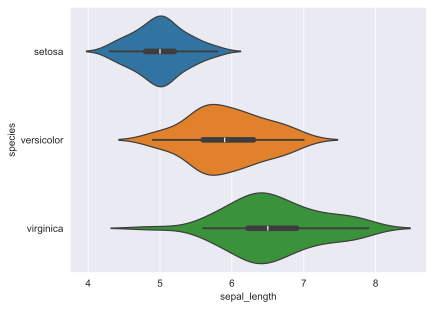

In [14]:
x = df_iris["sepal_length"]
y = df_iris["species"]

fig, ax = plt.subplots()
sns.violinplot(x=x, y=y, hue=y, ax=ax)
plt.show()

## Theming in Seaborn
The `set_theme()` applies default aesthetics to the plots: `style="whitegrid"`, `palette="pastel"`, etc.

In [15]:
sns.set_theme()

Seaborn splits matplotlib parameters into two independent groups. The first group constrols the aesthetic `style` of the plot: 

* `axes_style()` returns a dictionary of active style parameters
* `set_style()` sets the matplotlib parameters to pre-defined parameters

The predefined styles are:
* darkgrid
* whitegrid
* dark
* white
* ticks

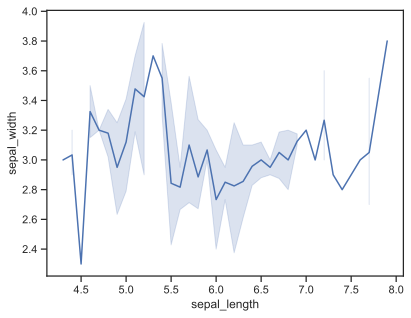

In [16]:

sns.set_style("ticks")
sns.lineplot(x="sepal_length", y="sepal_width", data=df_iris)

plt.show()

Both the white and ticks styles can benefit from removing the top and right axes spines, which are not needed. The seaborn function `despine()` can be called to remove them:

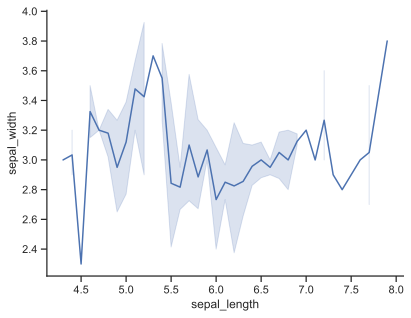

In [17]:
sns.set_style("ticks")
sns.lineplot(x="sepal_length", y="sepal_width", data=df_iris)
sns.despine()
plt.show()

If you want to customize the seaborn styles, you can pass a dictionary of parameters to the rc argument of axes_style() and set_style(). Note that you can only override the parameters that are part of the style definition through this method. (However, the higher-level set_theme() function takes a dictionary of any matplotlib parameters).

In [18]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

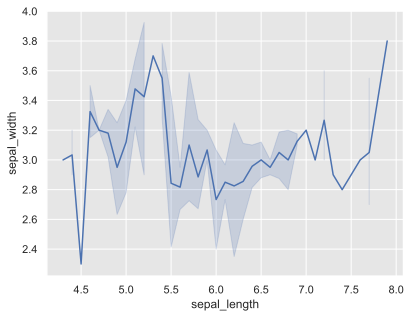

In [19]:
sns.set_theme()

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.lineplot(x="sepal_length", y="sepal_width", data=df_iris)
plt.show()

The second group of matplotlib parameters scales various elements of the figure:

* `plotting_context()`
* `set_context()` 

The four preset contexts, in order of relative size, are 
* paper
* notebook (default)
* talk
* poster

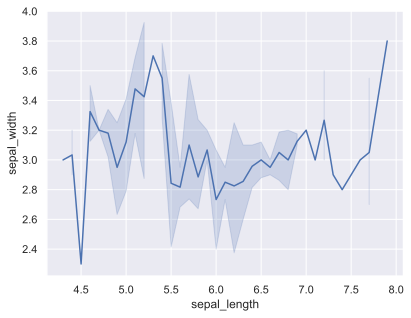

In [20]:
sns.set_theme()
sns.set_context('notebook')
sns.lineplot(x="sepal_length", y="sepal_width", data=df_iris)
plt.show()

You can also customize the figure size through the underlying matplotlib objects:

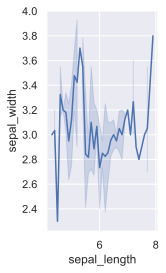

In [21]:
sns.set_context('notebook')
plt.figure(figsize = (2, 4))

sns.lineplot(x="sepal_length", y="sepal_width", data=df_iris)

plt.show()

Aesthetics Tutorial: https://seaborn.pydata.org/tutorial/aesthetics.html